In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

| Field Name               | Description                                                                                               |
|--------------------------|-----------------------------------------------------------------------------------------------------------|
| VendorID                 | A code indicating the LPEP provider that provided the record.                                              |
|                          | 1= Creative Mobile Technologies, LLC; 2= VeriFone Inc.                                                   |
| lpep_pickup_datetime     | The date and time when the meter was engaged.                                                             |
| lpep_dropoff_datetime    | The date and time when the meter was disengaged.                                                          |
| Passenger_count          | The number of passengers in the vehicle. This is a driver-entered value.                                  |
| Trip_distance            | The elapsed trip distance in miles reported by the taximeter.                                             |
| PULocationID             | TLC Taxi Zone in which the taximeter was engaged.                                                         |
| DOLocationID             | TLC Taxi Zone in which the taximeter was disengaged.                                                      |
| RateCodeID               | The final rate code in effect at the end of the trip.                                                     |
|                          | 1= Standard rate                                                                                          |
|                          | 2= JFK                                                                                                    |
|                          | 3= Newark                                                                                                 |
|                          | 4= Nassau or Westchester                                                                                  |
|                          | 5= Negotiated fare                                                                                        |
|                          | 6= Group ride                                                                                             |
| Store_and_fwd_flag       | This flag indicates whether the trip record was held in vehicle memory before sending to the vendor.       |
|                          | Y= store and forward trip                                                                                 |
|                          | N= not a store and forward trip                                                                           |
| Payment_type             | A numeric code signifying how the passenger paid for the trip.                                            |
|                          | 1= Credit card                                                                                            |
|                          | 2= Cash                                                                                                   |
|                          | 3= No charge                                                                                              |
|                          | 4= Dispute                                                                                                |
|                          | 5= Unknown                                                                                                |
|                          | 6= Voided trip                                                                                            |
| Fare_amount              | The time-and-distance fare calculated by the meter.                                                       |
| Extra                    | Miscellaneous extras and surcharges. Currently, this only includes the $0.50 and $1 rush hour and overnight charges.|
| MTA_tax                  | $0.50 MTA tax that is automatically triggered based on the metered rate in use.                          |
| Improvement_surcharge    | $0.30 improvement surcharge assessed on hailed trips at the flag drop. The improvement surcharge began being levied in 2015.|
| Tip_amount               | Tip amount – This field is automatically populated for credit card tips. Cash tips are not included.      |
| Tolls_amount             | Total amount of all tolls paid in trip.                                                                   |
| Total_amount             | The total amount charged to passengers. Does not include cash tips.                                       |
| Trip_type                | A code indicating whether the trip was a street-hail or a dispatch that is automatically assigned based on the metered rate in use but can be altered by the driver.|
|                          | 1= Street-hail                                                                                            |
|                          | 2= Dispatch                                                                                               |


In [2]:
df = pd.read_parquet('data/classwork/green_tripdata_2023-01.parquet')

In [3]:
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.90,1.0,0.5,4.03,0.0,None,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.70,1.0,0.5,2.64,0.0,None,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.20,1.0,0.5,1.94,0.0,None,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.50,0.5,1.5,1.70,0.0,None,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.00,0.5,1.5,0.00,0.0,None,1.0,8.00,1.0,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,None,NaN,49,62,NaN,4070.82,15.70,0.0,0.0,0.00,0.0,None,1.0,16.70,NaN,NaN,NaN
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,None,NaN,10,205,NaN,2.14,4.41,0.0,0.0,0.00,0.0,None,1.0,5.41,NaN,NaN,NaN
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,None,NaN,66,37,NaN,3.44,16.53,0.0,0.0,3.51,0.0,None,1.0,21.04,NaN,NaN,NaN
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,None,NaN,225,189,NaN,3.03,14.98,0.0,0.0,3.20,0.0,None,1.0,19.18,NaN,NaN,NaN


In [4]:
numerical_feats = ['passenger_count', 'trip_distance', 'fare_amount']
categorical_feats = ['PULocationID', 'DOLocationID', 'trip_type']

In [5]:
df2 = df[['lpep_pickup_datetime', 'lpep_dropoff_datetime'] + numerical_feats + categorical_feats].copy()

In [6]:
df2

,lpep_pickup_datetime,lpep_dropoff_datetime,passenger_count,trip_distance,fare_amount,PULocationID,DOLocationID,trip_type
0,2023-01-01 00:26:10,2023-01-01 00:37:11,1.0,2.58,14.90,166,143,1.0
1,2023-01-01 00:51:03,2023-01-01 00:57:49,1.0,1.81,10.70,24,43,1.0
2,2023-01-01 00:35:12,2023-01-01 00:41:32,1.0,0.00,7.20,223,179,1.0
3,2023-01-01 00:13:14,2023-01-01 00:19:03,1.0,1.30,6.50,41,238,1.0
4,2023-01-01 00:33:04,2023-01-01 00:39:02,1.0,1.10,6.00,41,74,1.0
...,...,...,...,...,...,...,...,...
68206,2023-01-31 22:29:00,2023-01-31 22:42:00,NaN,4070.82,15.70,49,62,NaN
68207,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,2.14,4.41,10,205,NaN
68208,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,3.44,16.53,66,37,NaN
68209,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,3.03,14.98,225,189,NaN


In [7]:
df2['lpep_pickup_datetime'] = pd.to_datetime(df2['lpep_pickup_datetime'])
df2['lpep_dropoff_datetime'] = pd.to_datetime(df2['lpep_dropoff_datetime'])

In [8]:
df2

,lpep_pickup_datetime,lpep_dropoff_datetime,passenger_count,trip_distance,fare_amount,PULocationID,DOLocationID,trip_type
0,2023-01-01 00:26:10,2023-01-01 00:37:11,1.0,2.58,14.90,166,143,1.0
1,2023-01-01 00:51:03,2023-01-01 00:57:49,1.0,1.81,10.70,24,43,1.0
2,2023-01-01 00:35:12,2023-01-01 00:41:32,1.0,0.00,7.20,223,179,1.0
3,2023-01-01 00:13:14,2023-01-01 00:19:03,1.0,1.30,6.50,41,238,1.0
4,2023-01-01 00:33:04,2023-01-01 00:39:02,1.0,1.10,6.00,41,74,1.0
...,...,...,...,...,...,...,...,...
68206,2023-01-31 22:29:00,2023-01-31 22:42:00,NaN,4070.82,15.70,49,62,NaN
68207,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,2.14,4.41,10,205,NaN
68208,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,3.44,16.53,66,37,NaN
68209,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,3.03,14.98,225,189,NaN


In [9]:
df2['duration'] = (df2['lpep_dropoff_datetime'] - df2['lpep_pickup_datetime'])
df2['duration'] = df2['duration'].dt.total_seconds() / 60

In [10]:
df2

,lpep_pickup_datetime,lpep_dropoff_datetime,passenger_count,trip_distance,fare_amount,PULocationID,DOLocationID,trip_type,duration
0,2023-01-01 00:26:10,2023-01-01 00:37:11,1.0,2.58,14.90,166,143,1.0,11.016667
1,2023-01-01 00:51:03,2023-01-01 00:57:49,1.0,1.81,10.70,24,43,1.0,6.766667
2,2023-01-01 00:35:12,2023-01-01 00:41:32,1.0,0.00,7.20,223,179,1.0,6.333333
3,2023-01-01 00:13:14,2023-01-01 00:19:03,1.0,1.30,6.50,41,238,1.0,5.816667
4,2023-01-01 00:33:04,2023-01-01 00:39:02,1.0,1.10,6.00,41,74,1.0,5.966667
...,...,...,...,...,...,...,...,...,...
68206,2023-01-31 22:29:00,2023-01-31 22:42:00,NaN,4070.82,15.70,49,62,NaN,13.000000
68207,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,2.14,4.41,10,205,NaN,8.000000
68208,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,3.44,16.53,66,37,NaN,16.000000
68209,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,3.03,14.98,225,189,NaN,18.000000


In [11]:
df2 = df2.drop(['lpep_pickup_datetime', 'lpep_dropoff_datetime'], axis=1)

In [12]:
df2

,passenger_count,trip_distance,fare_amount,PULocationID,DOLocationID,trip_type,duration
0,1.0,2.58,14.90,166,143,1.0,11.016667
1,1.0,1.81,10.70,24,43,1.0,6.766667
2,1.0,0.00,7.20,223,179,1.0,6.333333
3,1.0,1.30,6.50,41,238,1.0,5.816667
4,1.0,1.10,6.00,41,74,1.0,5.966667
...,...,...,...,...,...,...,...
68206,NaN,4070.82,15.70,49,62,NaN,13.000000
68207,NaN,2.14,4.41,10,205,NaN,8.000000
68208,NaN,3.44,16.53,66,37,NaN,16.000000
68209,NaN,3.03,14.98,225,189,NaN,18.000000


In [13]:
df2['PULocationID'] = df2['PULocationID'].astype('string')
df2['DOLocationID'] = df2['DOLocationID'].astype('string')

In [14]:
df2.dtypes

passenger_count    float64
trip_distance      float64
fare_amount        float64
PULocationID        string
DOLocationID        string
trip_type          float64
duration           float64
dtype: object

In [15]:
df2['PUDOLocationID'] = df2['PULocationID'] + '_' + df2['DOLocationID']

In [16]:
df2

,passenger_count,trip_distance,fare_amount,PULocationID,DOLocationID,trip_type,duration,PUDOLocationID
0,1.0,2.58,14.90,166,143,1.0,11.016667,166_143
1,1.0,1.81,10.70,24,43,1.0,6.766667,24_43
2,1.0,0.00,7.20,223,179,1.0,6.333333,223_179
3,1.0,1.30,6.50,41,238,1.0,5.816667,41_238
4,1.0,1.10,6.00,41,74,1.0,5.966667,41_74
...,...,...,...,...,...,...,...,...
68206,NaN,4070.82,15.70,49,62,NaN,13.000000,49_62
68207,NaN,2.14,4.41,10,205,NaN,8.000000,10_205
68208,NaN,3.44,16.53,66,37,NaN,16.000000,66_37
68209,NaN,3.03,14.98,225,189,NaN,18.000000,225_189


In [17]:
df2 = df2.drop(['PULocationID', 'DOLocationID'], axis=1)

In [18]:
df2

,passenger_count,trip_distance,fare_amount,trip_type,duration,PUDOLocationID
0,1.0,2.58,14.90,1.0,11.016667,166_143
1,1.0,1.81,10.70,1.0,6.766667,24_43
2,1.0,0.00,7.20,1.0,6.333333,223_179
3,1.0,1.30,6.50,1.0,5.816667,41_238
4,1.0,1.10,6.00,1.0,5.966667,41_74
...,...,...,...,...,...,...
68206,NaN,4070.82,15.70,NaN,13.000000,49_62
68207,NaN,2.14,4.41,NaN,8.000000,10_205
68208,NaN,3.44,16.53,NaN,16.000000,66_37
68209,NaN,3.03,14.98,NaN,18.000000,225_189


In [19]:
df2[df2.duplicated()]


,passenger_count,trip_distance,fare_amount,trip_type,duration,PUDOLocationID
1331,1.0,0.00,3.00,1.0,0.033333,264_264
3081,1.0,1.40,9.30,1.0,7.733333,74_41
4954,1.0,1.16,8.60,1.0,7.166667,74_41
5561,1.0,0.00,3.00,1.0,0.033333,264_264
5696,1.0,0.00,3.00,1.0,0.033333,264_264
...,...,...,...,...,...,...
67221,NaN,1.01,11.00,NaN,4.000000,193_193
67223,NaN,0.87,11.00,NaN,4.000000,193_193
67295,NaN,0.85,11.96,NaN,5.000000,7_193
67374,NaN,0.94,11.00,NaN,6.000000,193_193


In [20]:
df2 = df2.drop_duplicates()

In [21]:
df2

,passenger_count,trip_distance,fare_amount,trip_type,duration,PUDOLocationID
0,1.0,2.58,14.90,1.0,11.016667,166_143
1,1.0,1.81,10.70,1.0,6.766667,24_43
2,1.0,0.00,7.20,1.0,6.333333,223_179
3,1.0,1.30,6.50,1.0,5.816667,41_238
4,1.0,1.10,6.00,1.0,5.966667,41_74
...,...,...,...,...,...,...
68206,NaN,4070.82,15.70,NaN,13.000000,49_62
68207,NaN,2.14,4.41,NaN,8.000000,10_205
68208,NaN,3.44,16.53,NaN,16.000000,66_37
68209,NaN,3.03,14.98,NaN,18.000000,225_189


In [22]:
filtered_df = df2[df2.duplicated(subset=['trip_distance', 'duration'], keep=False)]
filtered_df = filtered_df.sort_values(by=['trip_distance', 'duration'])

filtered_df

,passenger_count,trip_distance,fare_amount,trip_type,duration,PUDOLocationID
1246,1.0,0.00,3.00,1.0,0.000000,226_264
2015,2.0,0.00,24.00,1.0,0.000000,3_264
2088,1.0,0.00,3.00,1.0,0.000000,264_264
2346,1.0,0.00,3.70,1.0,0.000000,145_264
2707,2.0,0.00,40.00,2.0,0.000000,255_264
...,...,...,...,...,...,...
65945,NaN,10.66,41.18,NaN,20.000000,74_33
42806,1.0,12.97,58.30,1.0,42.000000,112_116
67343,NaN,12.97,55.44,NaN,42.000000,72_138
32851,1.0,15.70,45.50,1.0,40.966667,130_123


In [23]:
df2 = df2[(df2['fare_amount'] > 0.0) & 
          (df2['trip_distance'] > 0.0) &
          (df2['duration'] > 0.0)]

In [24]:
df2

,passenger_count,trip_distance,fare_amount,trip_type,duration,PUDOLocationID
0,1.0,2.58,14.90,1.0,11.016667,166_143
1,1.0,1.81,10.70,1.0,6.766667,24_43
3,1.0,1.30,6.50,1.0,5.816667,41_238
4,1.0,1.10,6.00,1.0,5.966667,41_74
5,1.0,2.78,17.70,1.0,17.550000,41_262
...,...,...,...,...,...,...
68206,NaN,4070.82,15.70,NaN,13.000000,49_62
68207,NaN,2.14,4.41,NaN,8.000000,10_205
68208,NaN,3.44,16.53,NaN,16.000000,66_37
68209,NaN,3.03,14.98,NaN,18.000000,225_189


In [25]:
df2.loc[:,'trip_type'] = df2['trip_type'].astype('object')
df2.loc[:,'PUDOLocationID'] = df2['PUDOLocationID'].astype('object')

/tmp/ipykernel_1774/3956885934.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.loc[:,'trip_type'] = df2['trip_type'].astype('object')
/tmp/ipykernel_1774/3956885934.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.loc[:,'PUDOLocationID'] = df2['PUDOLocationID'].astype('object')
/tmp/ipykernel_1774/3956885934.py:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use eith

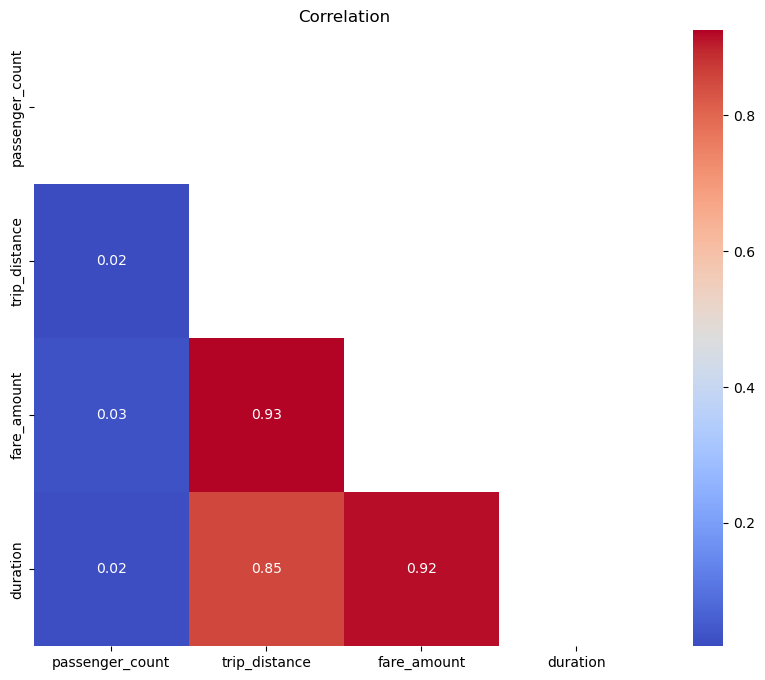

In [26]:
correlation_matrix = df2.select_dtypes(exclude=object).corr(method='spearman')


# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Create a heatmap of the correlation matrix, showing only below diagonal
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", mask=mask)
plt.title('Correlation')
plt.show()

In [27]:
df2 = df2.drop(['passenger_count'], axis=1)

In [28]:
df2

,trip_distance,fare_amount,trip_type,duration,PUDOLocationID
0,2.58,14.90,1.0,11.016667,166_143
1,1.81,10.70,1.0,6.766667,24_43
3,1.30,6.50,1.0,5.816667,41_238
4,1.10,6.00,1.0,5.966667,41_74
5,2.78,17.70,1.0,17.550000,41_262
...,...,...,...,...,...
68206,4070.82,15.70,NaN,13.000000,49_62
68207,2.14,4.41,NaN,8.000000,10_205
68208,3.44,16.53,NaN,16.000000,66_37
68209,3.03,14.98,NaN,18.000000,225_189


<Axes: xlabel='trip_type', ylabel='count'>

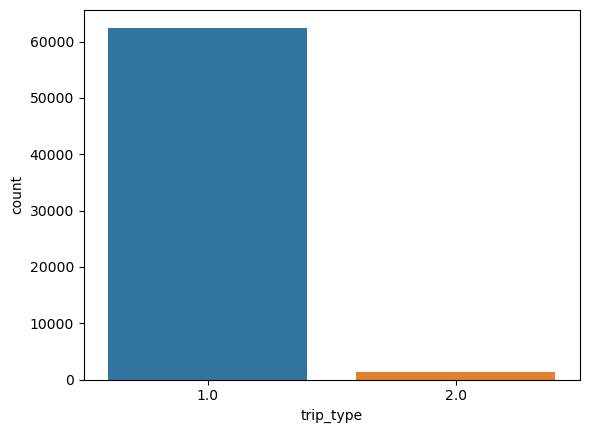

In [29]:
sns.countplot(df, x='trip_type')

In [30]:
df2['trip_type'].isnull().sum()

4162

In [31]:
df2 = df2.drop(['trip_type'], axis=1)

In [32]:
df2 = df2[['PUDOLocationID', 'trip_distance', 'fare_amount', 'duration']]


In [33]:
df2

,PUDOLocationID,trip_distance,fare_amount,duration
0,166_143,2.58,14.90,11.016667
1,24_43,1.81,10.70,6.766667
3,41_238,1.30,6.50,5.816667
4,41_74,1.10,6.00,5.966667
5,41_262,2.78,17.70,17.550000
...,...,...,...,...
68206,49_62,4070.82,15.70,13.000000
68207,10_205,2.14,4.41,8.000000
68208,66_37,3.44,16.53,16.000000
68209,225_189,3.03,14.98,18.000000


## Data Exploration

<Axes: xlabel='trip_distance', ylabel='Density'>

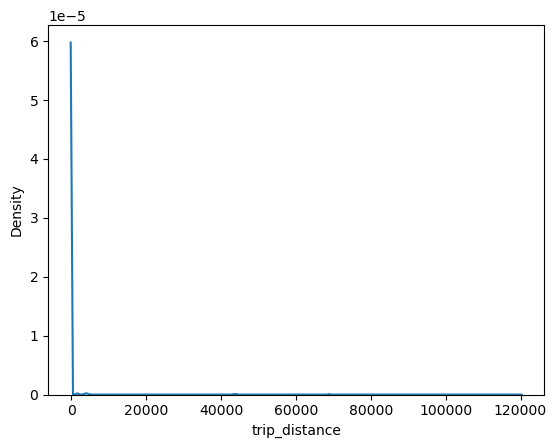

In [34]:
sns.kdeplot(df2, x='trip_distance')

In [35]:
trip = df2['trip_distance']

In [36]:
trip.describe()

count     64587.000000
mean          8.564014
std         601.294221
min           0.010000
25%           1.230000
50%           1.940000
75%           3.340000
max      120098.840000
Name: trip_distance, dtype: float64

In [37]:
np.percentile(trip, [90, 95, 99])

array([ 5.97  ,  7.92  , 14.7214])

<Axes: xlabel='trip_distance'>

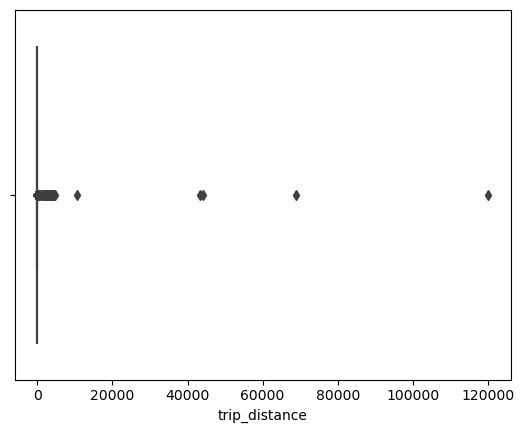

In [38]:
sns.boxplot(df2, x="trip_distance")

In [39]:
# Filter the DataFrame to exclude outliers
df2 = df2[(df2['trip_distance'] <= 14)]


<Axes: xlabel='trip_distance', ylabel='Density'>

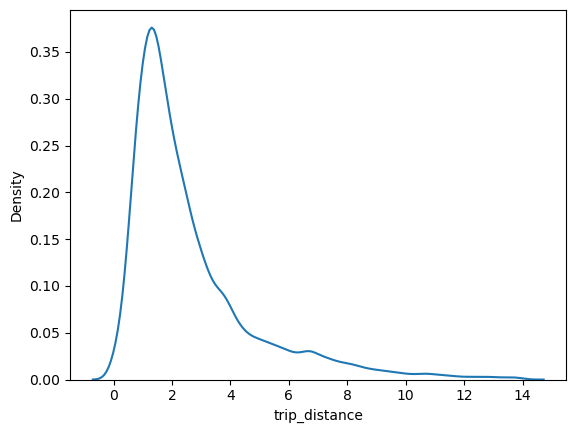

In [40]:
sns.kdeplot(df2, x='trip_distance')

<Axes: xlabel='trip_distance'>

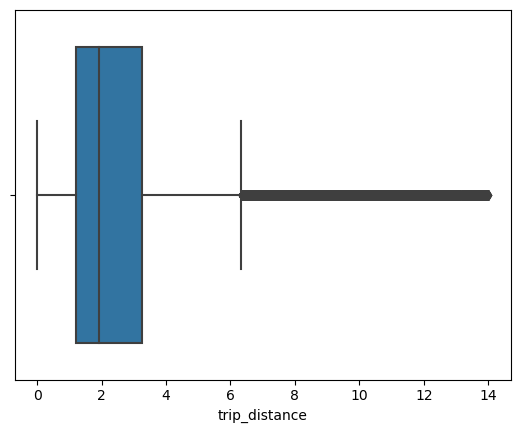

In [41]:
sns.boxplot(df2, x="trip_distance")

In [42]:
df2['trip_distance'].describe()

count    63851.000000
mean         2.641218
std          2.194524
min          0.010000
25%          1.220000
50%          1.920000
75%          3.270000
max         14.000000
Name: trip_distance, dtype: float64

<Axes: xlabel='fare_amount', ylabel='Density'>

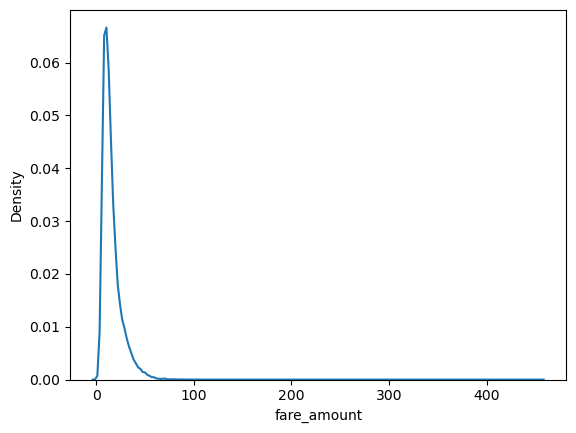

In [43]:
sns.kdeplot(df2, x='fare_amount')

<Axes: xlabel='fare_amount'>

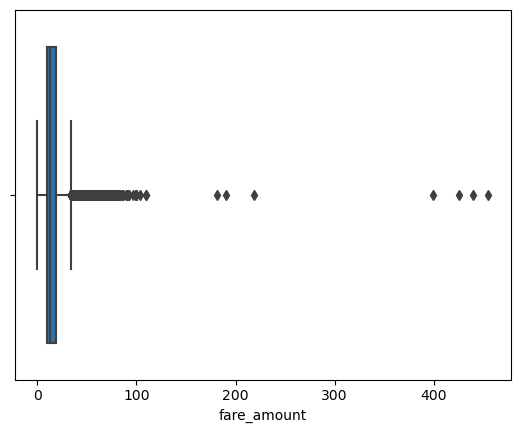

In [44]:
sns.boxplot(df2, x="fare_amount")

In [45]:
df2['fare_amount'].describe()

count    63851.000000
mean        15.828775
std         10.282814
min          0.010000
25%          9.300000
50%         12.800000
75%         19.100000
max        455.000000
Name: fare_amount, dtype: float64

In [46]:
np.percentile(trip, [90, 95, 99])

array([ 5.97  ,  7.92  , 14.7214])

In [47]:
df2 = df2[df2['fare_amount'] <= 30]

<Axes: xlabel='fare_amount', ylabel='Density'>

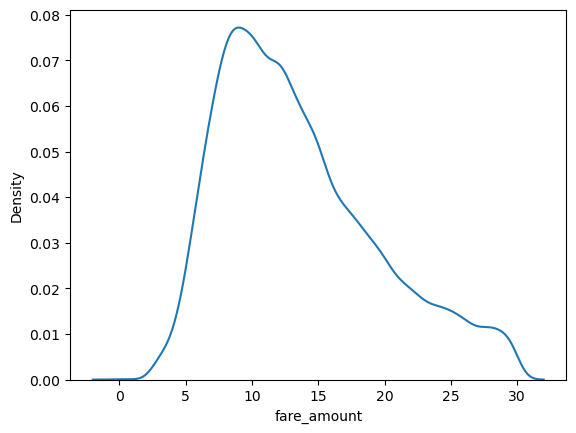

In [48]:
sns.kdeplot(df2, x='fare_amount')

<Axes: xlabel='fare_amount'>

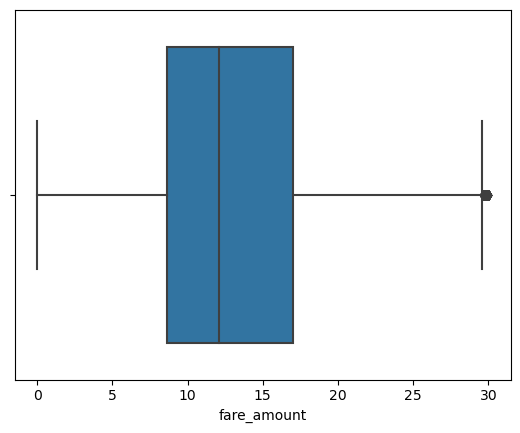

In [49]:
sns.boxplot(df2, x="fare_amount")

<Axes: xlabel='duration', ylabel='Density'>

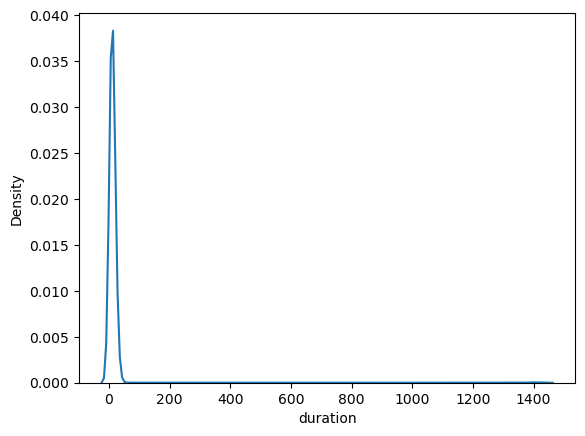

In [50]:
sns.kdeplot(df2, x='duration')

In [51]:
df2['duration'].describe()

count    58257.000000
mean        15.695134
std         71.849083
min          0.016667
25%          7.066667
50%         10.650000
75%         15.183333
max       1438.933333
Name: duration, dtype: float64

In [52]:
np.percentile(df2['duration'], [90, 95, 99])

array([20.39      , 24.        , 31.76466667])

In [53]:
df2 = df2[df2['duration'] < 27]

<Axes: xlabel='duration', ylabel='Density'>

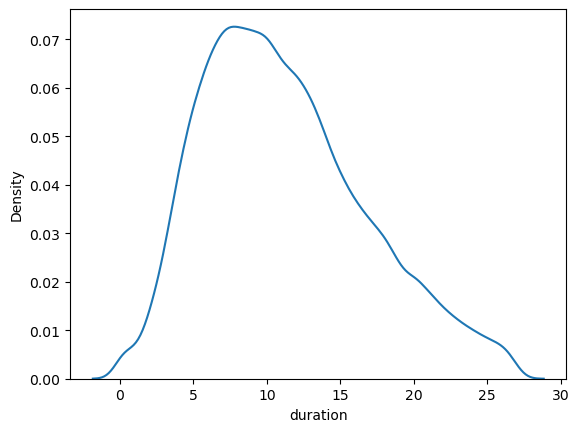

In [54]:
sns.kdeplot(df2, x='duration')

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import mean_squared_error

In [56]:
df2_dict = df2.drop(['duration'], axis=1).to_dict('records')

In [57]:
dv = DictVectorizer()
X = dv.fit_transform(df2_dict)

In [58]:
dv.feature_names_

['PUDOLocationID=102_102',
 'PUDOLocationID=102_82',
 'PUDOLocationID=106_17',
 'PUDOLocationID=106_181',
 'PUDOLocationID=106_228',
 'PUDOLocationID=106_40',
 'PUDOLocationID=106_89',
 'PUDOLocationID=106_97',
 'PUDOLocationID=108_108',
 'PUDOLocationID=108_21',
 'PUDOLocationID=108_210',
 'PUDOLocationID=108_55',
 'PUDOLocationID=10_10',
 'PUDOLocationID=10_121',
 'PUDOLocationID=10_130',
 'PUDOLocationID=10_132',
 'PUDOLocationID=10_205',
 'PUDOLocationID=10_218',
 'PUDOLocationID=112_102',
 'PUDOLocationID=112_107',
 'PUDOLocationID=112_112',
 'PUDOLocationID=112_129',
 'PUDOLocationID=112_137',
 'PUDOLocationID=112_140',
 'PUDOLocationID=112_141',
 'PUDOLocationID=112_142',
 'PUDOLocationID=112_143',
 'PUDOLocationID=112_144',
 'PUDOLocationID=112_145',
 'PUDOLocationID=112_148',
 'PUDOLocationID=112_157',
 'PUDOLocationID=112_160',
 'PUDOLocationID=112_163',
 'PUDOLocationID=112_17',
 'PUDOLocationID=112_179',
 'PUDOLocationID=112_186',
 'PUDOLocationID=112_188',
 'PUDOLocationID

In [59]:
y = df2['duration'].values

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [61]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [62]:
y_pred = lr.predict(X_test)

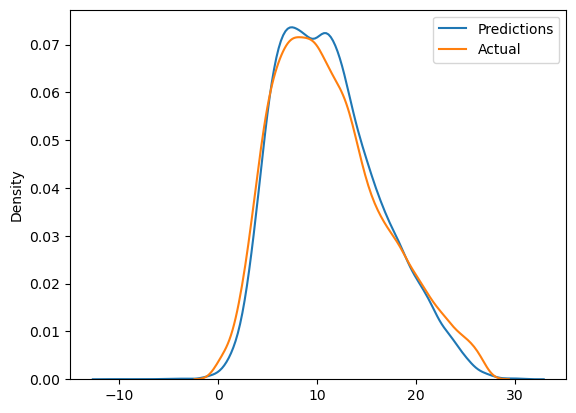

In [63]:
sns.kdeplot(y_pred, label='Predictions')
sns.kdeplot(y_test, label='Actual')

plt.legend()

In [64]:
mean_squared_error(y_test, y_pred, squared=False)

2.3725944601932114

In [65]:
rd = Ridge(alpha=1)
rd.fit(X_train, y_train)

y_pred2 = rd.predict(X_test)

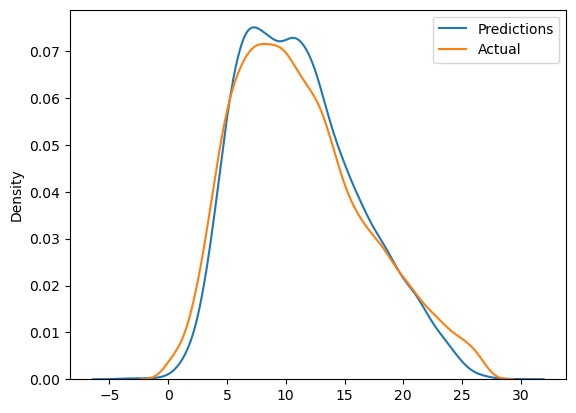

In [66]:
sns.kdeplot(y_pred2, label='Predictions')
sns.kdeplot(y_test, label='Actual')

plt.legend()

In [67]:
mean_squared_error(y_test, y_pred2, squared=False)

2.3315954516526545